In [44]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [45]:
# Get a list of all files which are .csv files in ../DOTSSimulator/Assets/SimulationResults
import os
files = [f for f in os.listdir('../DOTSSimulator/Assets/SimulationResults') if f.endswith('.csv')]
# Sort the files descending
files.sort(reverse=True)

print(f'Found {len(files)} files')
print(f'Newest file: {files[0]}')

result_file_path = f'../DOTSSimulator/Assets/SimulationResults/{files[0]}'

Found 102 files
Newest file: 2023-03-14-21-59-22.csv


In [46]:
results_df = pd.read_csv(result_file_path)
# Print basic information about the dataframe
print(results_df.info())

results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                5456 non-null   int64  
 1   AvgEnergy           5456 non-null   float64
 2   NoBoids             5456 non-null   int64  
 3   NoFoodSources       5456 non-null   int64  
 4   TotalFoodAvailable  5456 non-null   float64
 5   Polarization        5456 non-null   float64
 6   Expanse             5456 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 298.5 KB
None


,Step,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,10.00000,400,4,200.0000,0.499965,4.805955
1,8,10.00000,400,4,200.0133,0.499965,4.805955
2,16,10.00137,400,4,199.4767,0.499968,4.801925
3,24,10.00275,400,4,198.9400,0.499966,4.795129
4,32,10.00412,400,4,198.4033,0.499959,4.785664


In [47]:
def combine_axis_in_legend(axs, ax_to_legend):
    hanbdles =[]
    labels = []
    for ax_1 in axs:
        handle, label = ax_1.get_legend_handles_labels()
        hanbdles.extend(handle)
        labels.extend(label)
    ax_to_legend.legend(hanbdles, labels, loc=0)

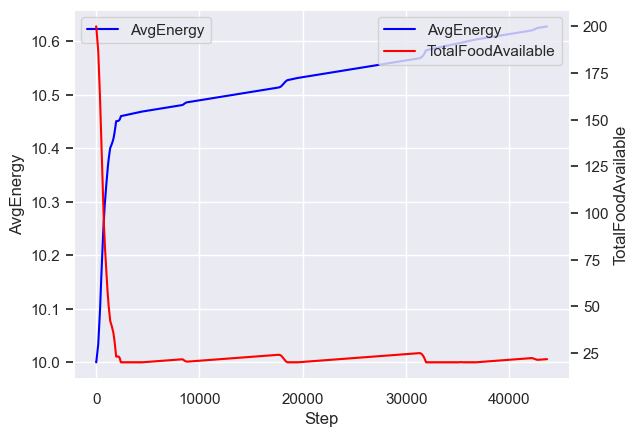

In [48]:
fig = plt.figure()
ax = fig.add_subplot()
sns.lineplot(data=results_df, x='Step', y='AvgEnergy', label='AvgEnergy', color='blue', ax=ax)
ax2 = plt.twinx()
ax2.grid(False)
sns.lineplot(data=results_df, x='Step', y='TotalFoodAvailable', label='TotalFoodAvailable', ax=ax2, color='red')
combine_axis_in_legend([ax, ax2], ax2)

<AxesSubplot: xlabel='Step', ylabel='NoBoids'>

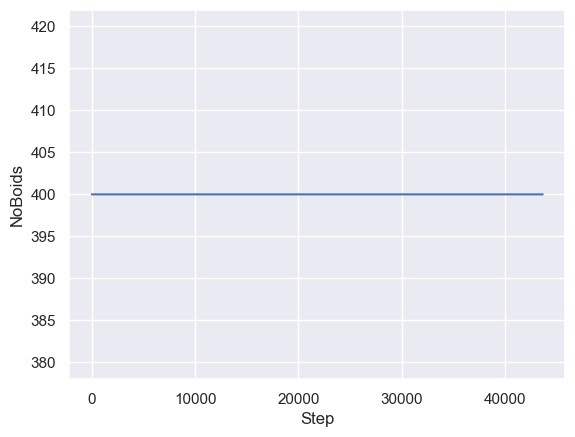

In [49]:
sns.lineplot(data=results_df, x='Step', y='NoBoids')

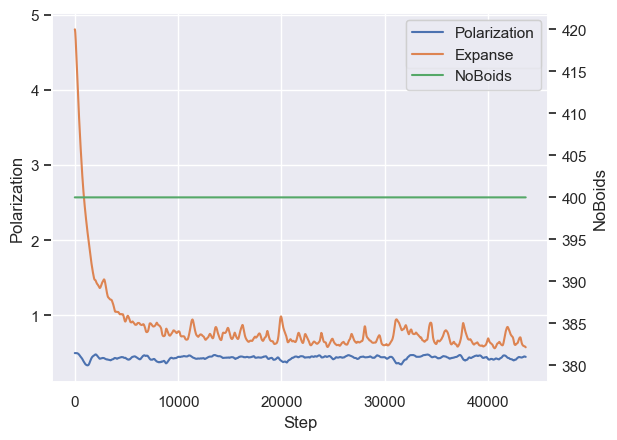

In [50]:
fig = plt.figure()
ax = fig.add_subplot()
sns.lineplot(data=results_df, x='Step', y='Polarization', label='Polarization', ax=ax)
sns.lineplot(data=results_df, x='Step', y='Expanse', label='Expanse', ax=ax)

ax2 = plt.twinx()
ax2.grid(False)
sns.lineplot(data=results_df, x='Step', y='NoBoids', color="g", label='NoBoids', ax=ax2)

combine_axis_in_legend([ax, ax2], ax2)
